<a href="https://colab.research.google.com/github/imabhinav-singh/Recommender-Systems/blob/main/KProtoTypes_App_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import dateutil.parser as dparser
from sklearn.cluster import KMeans
 
def del_duplicates(df):
  df = df.drop_duplicates(keep='last', inplace=False)
  app_data_df['Last Updated'] = pd.to_datetime(app_data_df['Last Updated'])
  df = df.sort_values(by=['App',  'Last Updated'], ascending=False)
  df = df.drop_duplicates(subset='App', keep='first', inplace=False)
  return df
 
#read dataset
app_data_df = pd.read_csv('googleplaystore.csv')
 
#Drop the abnormal row
app_data_df.drop(app_data_df[app_data_df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'].index, inplace=True)
 
#Delete all duplicate apps
app_data_df = del_duplicates(app_data_df)
 
#Drop the meaningless attributes
app_data_df = app_data_df[['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price', 'Content Rating']]
 
#Drop the rows with missing values
for row in app_data_df[app_data_df.isnull().any(axis=1)].index:
  app_data_df = app_data_df.drop(row)
app_data_df = app_data_df.reset_index(drop=True)
 
display(app_data_df)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,"1,000,000+",Free,0,Everyone
1,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,"10,000+",Free,0,Everyone
2,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,"1,000,000+",Free,0,Everyone
3,💎 I'm rich,LIFESTYLE,3.8,718,"10,000+",Paid,$399.99,Everyone
4,감성학원 BL 첫사랑,COMICS,4.4,190,"10,000+",Free,0,Everyone
...,...,...,...,...,...,...,...,...
8190,058.ba,NEWS_AND_MAGAZINES,4.4,27,100+,Free,0,Everyone
8191,/u/app,COMMUNICATION,4.7,573,"10,000+",Free,0,Mature 17+
8192,.R,TOOLS,4.5,259,"10,000+",Free,0,Everyone
8193,- Free Comics - Comic Apps,COMICS,3.5,115,"10,000+",Free,0,Mature 17+


In [ ]:
app_org_data_df = app_data_df.copy()
app_data_df = app_data_df[['Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price', 'Content Rating']]

In [ ]:
app_data_df['Installs'] = app_data_df.Installs.str.replace('+', '')
app_data_df['Installs'] = app_data_df.Installs.str.replace(',', '')
app_data_df['Price'] = app_data_df.Price.str.replace('$','')

In [ ]:
display(app_data_df)

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ENTERTAINMENT,4.7,11661,1000000,Free,0,Everyone
1,TOOLS,4.0,19,10000,Free,0,Everyone
2,SOCIAL,4.6,22098,1000000,Free,0,Everyone
3,LIFESTYLE,3.8,718,10000,Paid,399.99,Everyone
4,COMICS,4.4,190,10000,Free,0,Everyone
...,...,...,...,...,...,...,...
8190,NEWS_AND_MAGAZINES,4.4,27,100,Free,0,Everyone
8191,COMMUNICATION,4.7,573,10000,Free,0,Mature 17+
8192,TOOLS,4.5,259,10000,Free,0,Everyone
8193,COMICS,3.5,115,10000,Free,0,Mature 17+


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

scaler.fit(app_data_df[['Rating']])
app_data_df['Rating'] = scaler.transform(app_data_df[['Rating']])

scaler.fit(app_data_df[['Price']])
app_data_df['Price'] = scaler.transform(app_data_df[['Price']]) 

scaler.fit(app_data_df[['Installs']])
app_data_df['Installs'] = scaler.transform(app_data_df[['Installs']]) 

scaler.fit(app_data_df[['Reviews']])
app_data_df['Reviews'] = scaler.transform(app_data_df[['Reviews']])

In [ ]:
display(app_data_df)

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ENTERTAINMENT,0.925,1.491844e-04,9.999990e-04,Free,0.000000,Everyone
1,TOOLS,0.750,2.303018e-07,9.999000e-06,Free,0.000000,Everyone
2,SOCIAL,0.900,2.827211e-04,9.999990e-04,Free,0.000000,Everyone
3,LIFESTYLE,0.700,9.173689e-06,9.999000e-06,Paid,0.999975,Everyone
4,COMICS,0.850,2.418169e-06,9.999000e-06,Free,0.000000,Everyone
...,...,...,...,...,...,...,...
8190,NEWS_AND_MAGAZINES,0.850,3.326582e-07,9.900000e-08,Free,0.000000,Everyone
8191,COMMUNICATION,0.925,7.318480e-06,9.999000e-06,Free,0.000000,Mature 17+
8192,TOOLS,0.875,3.300993e-06,9.999000e-06,Free,0.000000,Everyone
8193,COMICS,0.625,1.458578e-06,9.999000e-06,Free,0.000000,Mature 17+


In [ ]:
pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=7, verbose=2, max_iter=20)
clusters = kproto.fit_predict(app_data_df.values, categorical=[0 ,4, 6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 3350, ncost: 1341.5716304095495
Run: 1, iteration: 2/20, moves: 1505, ncost: 1340.1864857546723
Run: 1, iteration: 3/20, moves: 775, ncost: 1339.527236169269
Run: 1, iteration: 4/20, moves: 150, ncost: 1339.4637817003556
Run: 1, iteration: 5/20, moves: 0, ncost: 1339.4637817003556
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 3255, ncost: 1239.5205966724584
Run: 2, iteration: 2/20, moves: 538, ncost: 1238.8858657647195
Run: 2, iteration: 3/20, moves: 54, ncost: 1238.848369567535
Run: 2, iteration: 4/20, moves: 10, ncost: 1238.8479968291604
Run: 2, iteration: 5/20, moves: 1, ncost: 1238.8479798549063
Run: 2, iteration: 6/20, moves: 1, ncost: 1238.847976117362
Run: 2, iteration: 7/20, moves: 0, ncost: 1238.847976117362
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iterati

In [ ]:
print(kproto.cluster_centroids_)
app_df_labels = app_data_df.copy()
app_df_labels.insert(7, 'Label', clusters)
print(app_df_labels)

[array([[7.83567416e-01, 6.07415311e-03, 2.31500290e-02, 1.63342697e-04],
       [7.95378989e-01, 7.26812416e-03, 2.01736354e-02, 1.61901596e-04],
       [7.08041008e-01, 6.37742326e-04, 2.11076571e-03, 5.53359684e-06],
       [8.10631001e-01, 7.20269575e-03, 1.15070952e-02, 1.77914952e-04],
       [8.82656732e-01, 2.93143169e-03, 6.45215342e-03, 2.82374101e-05],
       [8.28916211e-01, 1.33383325e-04, 8.07176922e-05, 3.74680328e-02],
       [7.65726329e-01, 4.46622324e-04, 2.25937126e-03, 1.47373541e-04]]), array([['TOOLS', 'Free', 'Everyone'],
       ['FAMILY', 'Free', 'Teen'],
       ['FAMILY', 'Free', 'Everyone'],
       ['GAME', 'Free', 'Mature 17+'],
       ['FINANCE', 'Free', 'Everyone'],
       ['FAMILY', 'Paid', 'Everyone'],
       ['BUSINESS', 'Free', 'Everyone']], dtype='<U10')]
                Category  Rating       Reviews  ...     Price Content Rating  Label
0          ENTERTAINMENT   0.925  1.491844e-04  ...  0.000000       Everyone      4
1                  TOOLS   0.75

In [ ]:
app_clusters = {}
for i in range(7):
  app_clusters[i] = app_org_data_df.iloc[app_df_labels[app_df_labels['Label'] == i].index]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned


app_review_df = pd.read_csv('/content/googleplaystore_user_reviews.csv')
app_review_df = app_review_df.dropna()
reviews = app_review_df['Translated_Review']
labels = app_review_df['Sentiment']

Stop = set(stopwords.words('english'))
WrdLem = WordNetLemmatizer()
#Cleaning the reviews(removing html tags,punctuation,Lemmatizations) 
nltk.download('wordnet')
Cleaned_sent=[]
for sent in reviews:
    r1=[]
    sent=cleanhtml(sent)
    sent=cleanpunc(sent)
    sent=sent.lower()
    for  word in sent.split():
        if ((word.isalpha()) & (len(word)>2)):
            if word not in Stop:
                w=WrdLem.lemmatize(word)
                r1.append(w)
            else:
                continue
        else:
            continue
    str1 = (" ".join(r1))        
     
    Cleaned_sent.append(str1)

app_review_df['Cleaned_text'] = Cleaned_sent
app_review_df = app_review_df.reset_index(drop=True)
display(app_review_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Cleaned_text
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,like eat delicious food thats cooking food cas...
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,help eating healthy exercise regular basis
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,work great especially going grocery store
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,best idea
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000,best way
...,...,...,...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,ad older many agent much owner posted detail r...
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,photo posted portal load fit purpose sure stor...
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,dumb app wanted post property rent give option...
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,property business got link sm happy performanc...


In [ ]:
app_review_copy = app_review_df.copy()
for app in app_review_df['App']:
  if app not in list(app_org_data_df['App']):
    app_review_copy.drop(app_review_copy[app_review_copy['App'] == app].index, inplace=True)
    app_review_copy = app_review_copy.reset_index(drop=True)
app_review_df = app_review_copy
display(app_review_copy)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Cleaned_text
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,like eat delicious food thats cooking food cas...
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,help eating healthy exercise regular basis
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,work great especially going grocery store
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,best idea
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000,best way
...,...,...,...,...,...,...
35885,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,ad older many agent much owner posted detail r...
35886,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,photo posted portal load fit purpose sure stor...
35887,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,dumb app wanted post property rent give option...
35888,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,property business got link sm happy performanc...


In [ ]:
clusters[app_org_data_df[app_org_data_df['App'] == '10 Best Foods for You'].index][0]

6

In [ ]:
def filter_ratings(df, app):
  rate_app = df.loc[df['App'] == app].values[0][2]
  return df.loc[df['Rating'] >= rate_app]

def filter_category(df, app):
  cat_app = df.loc[df['App'] == app].values[0][1]
  return df.loc[df['Category'] == cat_app]

X = app_review_df.values
recommended_apps = [[] for i in range(len(X))]
for user_id in range(len(X)):
  label = clusters[app_org_data_df[app_org_data_df['App'] == X[user_id][0]].index][0]
  rec_set = filter_category(filter_ratings(app_clusters[label], X[user_id][0]), X[user_id][0]).values[:,0]
  recommended_apps[user_id].append(rec_set)

In [ ]:
cov_set = set()
for i in range(len(X)):
  for j in range(len(recommended_apps[i][0])):
    cov_set.add(recommended_apps[i][0][j])
print(len(cov_set))

6543


In [ ]:
ils_mat = np.zeros((len(X), len(X)))
for i in range(len(X)):
  for j in range(len(X)):
    list1 = set(recommended_apps[i][0])
    list2 = set(recommended_apps[j][0])
    com = len (list1 & list2)
    ils_mat[i][j] = 1 - (2 * com) / (len(list1) + len(list2))
ils = np.sum(ils_mat) / (len(X)*len(X) - len(X))
print(ils)

In [ ]:
pd.Series(clusters).value_counts()

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from tqdm import tqdm

  0%|          | 0/8 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3042, ncost: 1425.2502868477432
Run: 1, iteration: 2/100, moves: 994, ncost: 1423.1353153310715
Run: 1, iteration: 3/100, moves: 195, ncost: 1423.0380046514945
Run: 1, iteration: 4/100, moves: 0, ncost: 1423.0380046514945
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 64, ncost: 1450.9503797060468
Run: 2, iteration: 2/100, moves: 0, ncost: 1450.9503797060468
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 808, ncost: 1419.4487034308402
Run: 3, iteration: 2/100, moves: 3, ncost: 1419.4486423292983
Run: 3, iteration: 3/100, moves: 1, ncost: 1419.4486403192473
Run: 3, iteration: 4/100, moves: 0, ncost: 1419.4486403192473
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 558, ncost: 1419.

 12%|█▎        | 1/8 [00:26<03:05, 26.48s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3012, ncost: 1491.1380247998877
Run: 1, iteration: 2/100, moves: 1576, ncost: 1481.6710513874352
Run: 1, iteration: 3/100, moves: 1256, ncost: 1371.2356273152834
Run: 1, iteration: 4/100, moves: 812, ncost: 1369.739571954783
Run: 1, iteration: 5/100, moves: 139, ncost: 1369.3549455129855
Run: 1, iteration: 6/100, moves: 11, ncost: 1369.3517648795664
Run: 1, iteration: 7/100, moves: 0, ncost: 1369.3517648795664
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1223, ncost: 1370.7076863295285
Run: 2, iteration: 2/100, moves: 194, ncost: 1370.6224906146135
Run: 2, iteration: 3/100, moves: 1, ncost: 1370.6224842816591
Run: 2, iteration: 4/100, moves: 0, ncost: 1370.6224842816591
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1897, ncost: 1265.392226811

 25%|██▌       | 2/8 [00:59<02:49, 28.30s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1594, ncost: 1249.8829574068318
Run: 1, iteration: 2/100, moves: 524, ncost: 1249.5109036408496
Run: 1, iteration: 3/100, moves: 59, ncost: 1249.4823737849845
Run: 1, iteration: 4/100, moves: 17, ncost: 1249.4744050345723
Run: 1, iteration: 5/100, moves: 2, ncost: 1249.474180738211
Run: 1, iteration: 6/100, moves: 0, ncost: 1249.474180738211
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1794, ncost: 1237.652763359328
Run: 2, iteration: 2/100, moves: 81, ncost: 1237.481849550781
Run: 2, iteration: 3/100, moves: 22, ncost: 1237.450851016163
Run: 2, iteration: 4/100, moves: 5, ncost: 1237.4503034954162
Run: 2, iteration: 5/100, moves: 0, ncost: 1237.4503034954162
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1797, ncost: 1300.6029848138303
Run: 3

 38%|███▊      | 3/8 [01:36<02:34, 30.98s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1966, ncost: 1175.5067237009946
Run: 1, iteration: 2/100, moves: 807, ncost: 1174.8475230467857
Run: 1, iteration: 3/100, moves: 209, ncost: 1174.7960017808532
Run: 1, iteration: 4/100, moves: 21, ncost: 1174.795136214485
Run: 1, iteration: 5/100, moves: 0, ncost: 1174.795136214485
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2169, ncost: 1346.5543398738134
Run: 2, iteration: 2/100, moves: 771, ncost: 1343.1303839179789
Run: 2, iteration: 3/100, moves: 392, ncost: 1341.8076598907553
Run: 2, iteration: 4/100, moves: 412, ncost: 1340.894409229886
Run: 2, iteration: 5/100, moves: 41, ncost: 1340.860346366561
Run: 2, iteration: 6/100, moves: 4, ncost: 1340.8602120875735
Run: 2, iteration: 7/100, moves: 11, ncost: 1340.8581096901175
Run: 2, iteration: 8/100, moves: 17, ncost: 1340.8369258229393
Run: 2, iteration:

 50%|█████     | 4/8 [02:14<02:13, 33.29s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3037, ncost: 1160.182190858782
Run: 1, iteration: 2/100, moves: 1985, ncost: 1153.2689570048149
Run: 1, iteration: 3/100, moves: 490, ncost: 1151.6266653446223
Run: 1, iteration: 4/100, moves: 634, ncost: 1150.1786014814172
Run: 1, iteration: 5/100, moves: 490, ncost: 1149.4742810460696
Run: 1, iteration: 6/100, moves: 33, ncost: 1149.4589875147526
Run: 1, iteration: 7/100, moves: 0, ncost: 1149.4589875147526
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2558, ncost: 1181.8108547754832
Run: 2, iteration: 2/100, moves: 553, ncost: 1180.4024309846961
Run: 2, iteration: 3/100, moves: 84, ncost: 1180.3670186584268
Run: 2, iteration: 4/100, moves: 1, ncost: 1180.366959778898
Run: 2, iteration: 5/100, moves: 3, ncost: 1180.3666632758925
Run: 2, iteration: 6/100, moves: 0, ncost: 1180.3666632758925
Init: initializin

 62%|██████▎   | 5/8 [02:56<01:47, 35.69s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2027, ncost: 1193.7811680002844
Run: 1, iteration: 2/100, moves: 375, ncost: 1193.7633011192331
Run: 1, iteration: 3/100, moves: 32, ncost: 1193.762588725832
Run: 1, iteration: 4/100, moves: 7, ncost: 1193.7620236606972
Run: 1, iteration: 5/100, moves: 0, ncost: 1193.7620236606972
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2507, ncost: 1106.1418926350123
Run: 2, iteration: 2/100, moves: 939, ncost: 1104.2853755035344
Run: 2, iteration: 3/100, moves: 131, ncost: 1104.1742197141152
Run: 2, iteration: 4/100, moves: 2, ncost: 1104.1741806169177
Run: 2, iteration: 5/100, moves: 0, ncost: 1104.1741806169177
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 2730, ncost: 1182.611035700875
Run: 3, iteration: 2/100, moves: 1035, ncost: 1181.8318256962423

 75%|███████▌  | 6/8 [03:30<01:10, 35.23s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2102, ncost: 1070.949237161973
Run: 1, iteration: 2/100, moves: 1434, ncost: 1069.318499565099
Run: 1, iteration: 3/100, moves: 597, ncost: 1068.7852010536353
Run: 1, iteration: 4/100, moves: 279, ncost: 1067.966518062472
Run: 1, iteration: 5/100, moves: 79, ncost: 1067.9149660753976
Run: 1, iteration: 6/100, moves: 12, ncost: 1067.9135783866943
Run: 1, iteration: 7/100, moves: 0, ncost: 1067.9135783866943
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3387, ncost: 1005.3985801302869
Run: 2, iteration: 2/100, moves: 1194, ncost: 1000.7406812388344
Run: 2, iteration: 3/100, moves: 405, ncost: 1000.5417057120641
Run: 2, iteration: 4/100, moves: 11, ncost: 1000.5410725432474
Run: 2, iteration: 5/100, moves: 0, ncost: 1000.5410725432474
Init: initializing centroids
Init: initializing clusters
Starting iterations..

 88%|████████▊ | 7/8 [04:07<00:35, 35.89s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2029, ncost: 1033.8389265674182
Run: 1, iteration: 2/100, moves: 332, ncost: 1033.7540828815872
Run: 1, iteration: 3/100, moves: 16, ncost: 1033.750804200182
Run: 1, iteration: 4/100, moves: 5, ncost: 1033.750310119177
Run: 1, iteration: 5/100, moves: 2, ncost: 1033.7502076413857
Run: 1, iteration: 6/100, moves: 0, ncost: 1033.7502076413857
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2168, ncost: 1041.0562483001308
Run: 2, iteration: 2/100, moves: 442, ncost: 1040.6499137086948
Run: 2, iteration: 3/100, moves: 162, ncost: 1040.3574991415053
Run: 2, iteration: 4/100, moves: 52, ncost: 1040.3155695038577
Run: 2, iteration: 5/100, moves: 9, ncost: 1040.314648095418
Run: 2, iteration: 6/100, moves: 0, ncost: 1040.314648095418
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3

100%|██████████| 8/8 [04:50<00:00, 36.27s/it]


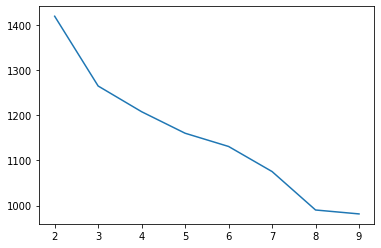

In [ ]:
costs = []
n_clusters = []
clusters_assigned = []

for i in tqdm(range(2, 10)):
  kproto = KPrototypes(n_clusters= i, init='random', verbose=2)
  clusters = kproto.fit_predict(app_data_df.values, categorical=[0, 5])
  costs.append(kproto.cost_)
  n_clusters.append(i)
  clusters_assigned.append(clusters)
         
plt.plot(n_clusters, costs)
plt.show()